In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns


# Load the dataset
file_path = '/Users/rakibul/Desktop/uni koblenz/winter 202324/Research Lab/code/models/trainn.csv'
dataset = pd.read_csv(file_path)

# Select symptom columns and prognosis
symptom_columns = dataset.columns[1:-1]  # Exclude 'id' and 'prognosis' columns
prognosis_column = 'prognosis'

# Create a binary matrix for symptoms
symptom_matrix = dataset[symptom_columns]

# Calculate the frequency of co-occurring symptoms for each prognosis
co_occurrence = {}
for prognosis in dataset[prognosis_column].unique():
    subset = symptom_matrix[dataset[prognosis_column] == prognosis]
    co_occurrence[prognosis] = subset.sum()

# Convert to DataFrame
co_occurrence_df = pd.DataFrame(co_occurrence).fillna(0).astype(int)


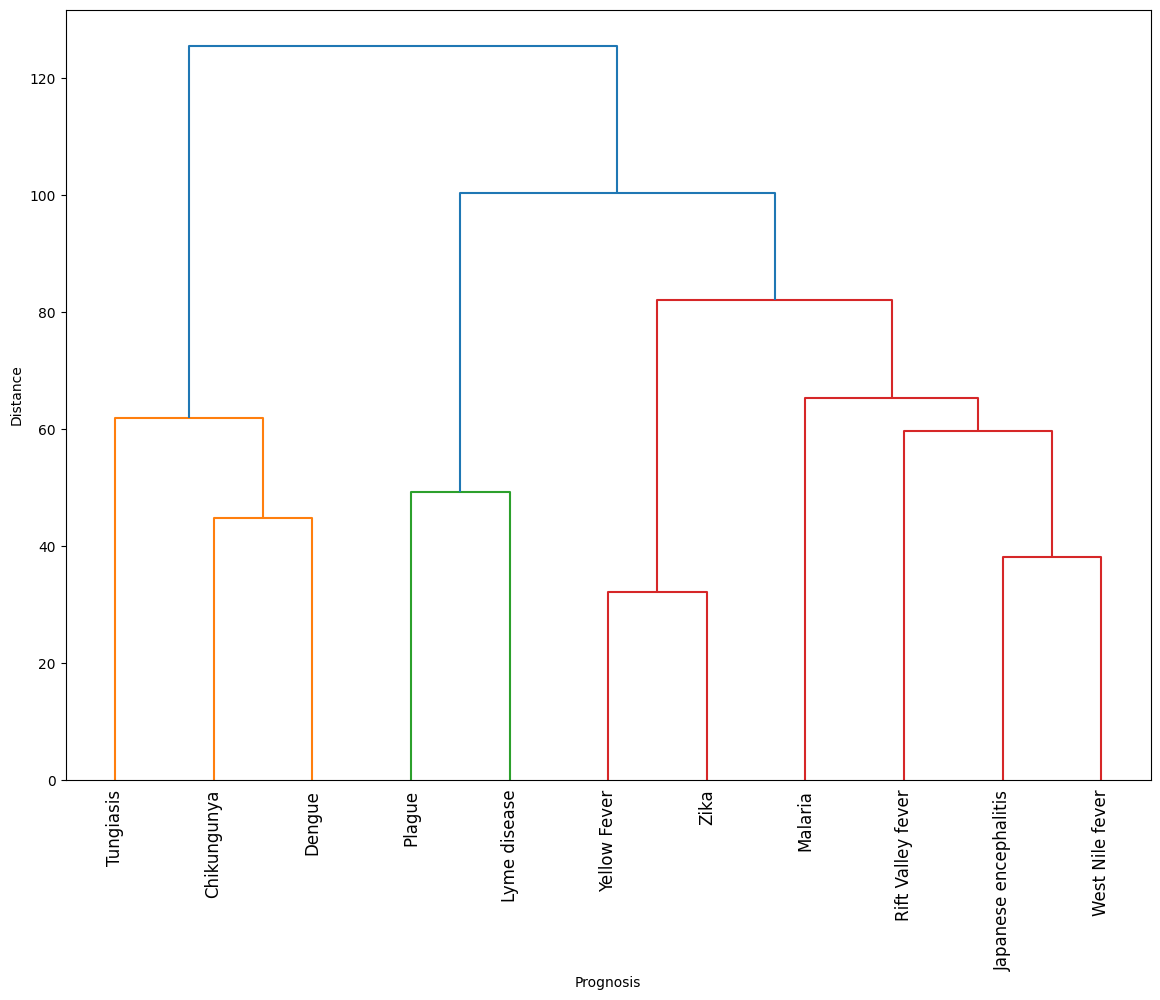

In [2]:


# Perform hierarchical clustering
linked = linkage(co_occurrence_df.T, method='ward')

# Plot the dendrogram
plt.figure(figsize=(14, 10))
dendrogram(linked, labels=co_occurrence_df.columns, leaf_rotation=90)
#plt.title('Dendrogram of Prognosis Based on Symptoms')
plt.xlabel('Prognosis')
plt.ylabel('Distance')
plt.show()


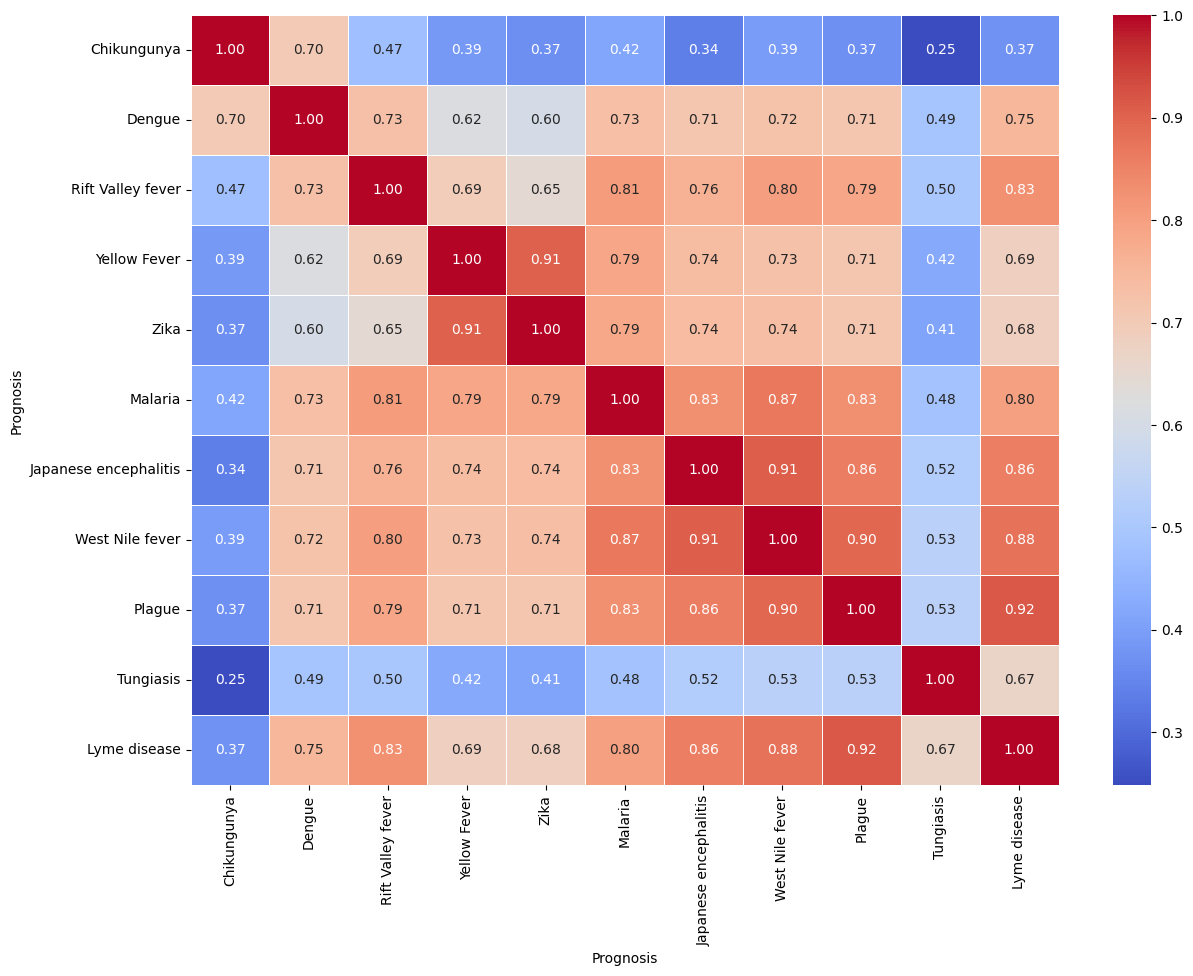

In [3]:


# Calculate cosine similarity between symptom profiles
similarity_matrix = cosine_similarity(co_occurrence_df.T)
similarity_df = pd.DataFrame(similarity_matrix, index=co_occurrence_df.columns, columns=co_occurrence_df.columns)

# Plot heatmap of similarity matrix
plt.figure(figsize=(14, 10))
sns.heatmap(similarity_df, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
#plt.title('Similarity Matrix of Prognoses Based on Symptoms')
plt.xlabel('Prognosis')
plt.ylabel('Prognosis')
plt.show()
